# Import & configure library

In [1]:
import platform
import time
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn


In [2]:
print(f'{platform.python_version()=}')

print(f'{np.__version__=}')
print(f'{pd.__version__=}')
print(f'{matplotlib.__version__=}')
print(f'{sklearn.__version__=}')


platform.python_version()='3.8.3rc1'
np.__version__='1.17.4'
pd.__version__='1.0.3'
matplotlib.__version__='3.2.1'
sklearn.__version__='0.22.2.post1'


In [3]:
SEED = 42
np.random.seed(SEED)

START_TIME = time.time()


In [4]:
## Load preprocessed dataset

In [5]:
dataset = pd.read_pickle('./dataset.pk')


## TF IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=25, norm='l2', lowercase=False)
X = vectorizer.fit_transform(dataset['content'])


# K-means++

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=SEED, verbose=1, n_init=10, precompute_distances=True)
y_pred = kmeans.fit_predict(X)


Initialization complete
Iteration  0, inertia 77114.855
Iteration  1, inertia 39469.775
Iteration  2, inertia 39325.252
Iteration  3, inertia 39318.022
Iteration  4, inertia 39316.150
Iteration  5, inertia 39315.498
Iteration  6, inertia 39315.158
Iteration  7, inertia 39314.864
Iteration  8, inertia 39314.572
Iteration  9, inertia 39314.253
Iteration 10, inertia 39313.791
Iteration 11, inertia 39313.261
Iteration 12, inertia 39312.833
Iteration 13, inertia 39312.405
Iteration 14, inertia 39312.035
Iteration 15, inertia 39311.758
Iteration 16, inertia 39311.587
Iteration 17, inertia 39311.485
Iteration 18, inertia 39311.418
Iteration 19, inertia 39311.376
Iteration 20, inertia 39311.350
Iteration 21, inertia 39311.332
Iteration 22, inertia 39311.319
Iteration 23, inertia 39311.311
Iteration 24, inertia 39311.305
Iteration 25, inertia 39311.300
Iteration 26, inertia 39311.299
Iteration 27, inertia 39311.297
Iteration 28, inertia 39311.297
Iteration 29, inertia 39311.297
Converged at ite

# PCA for 3D visualization

In [8]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = [
    TruncatedSVD(n_components=3, algorithm='arpack', random_state=SEED),
    TruncatedSVD(n_components=3, algorithm='randomized', n_iter=10, random_state=SEED)
]
pca_variance = []

for i in range(len(pca)):
    try:
        pca[i] = pca[i].fit(X)
    except:
        if X.dtype == np.int64:
            pca[i] = pca[i].fit(X.astype(np.float64).toarray())
        else:
            pca[i] = pca[i].fit(X.toarray())

    gc.collect()
    print(f'Variance for pca[{i}] : {pca[i].explained_variance_ratio_.sum()}')
    pca_variance.append(pca[i].explained_variance_ratio_.sum())

# select best PCA
index_best_pca = pca_variance.index(max(pca_variance))
X_reduced = pca[i].transform(X)


Variance for pca[0] : 0.03687181708953069
Variance for pca[1] : 0.036871817122374424


# Cluster 3D visualization
 Source : https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

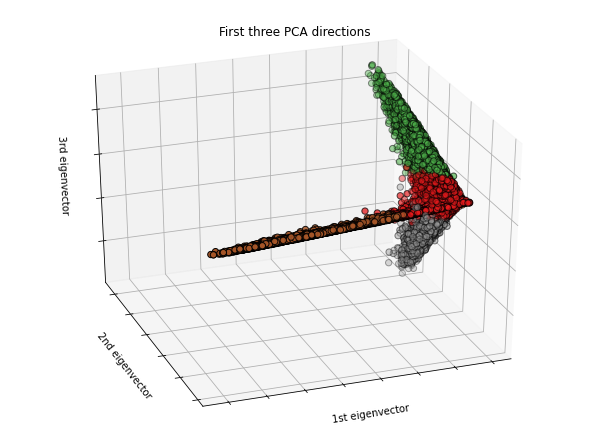

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred,
           cmap='Set1', edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()



# Supervised evaluation

In [10]:
from sklearn import metrics
y_true = dataset['topic'].to_list()


In [11]:
print(f'{metrics.adjusted_rand_score(y_true, y_pred)=}')
print(f'{metrics.homogeneity_score(y_true, y_pred)=}')
print(f'{metrics.completeness_score(y_true, y_pred)=}')
print(f'{metrics.v_measure_score(y_true, y_pred)=}')
print(f'{metrics.fowlkes_mallows_score(y_true, y_pred)=}')


metrics.adjusted_rand_score(y_true, y_pred)=0.6217382880435744
metrics.homogeneity_score(y_true, y_pred)=0.717235296227637
metrics.completeness_score(y_true, y_pred)=0.7380120740605376
metrics.v_measure_score(y_true, y_pred)=0.7274753686083797
metrics.fowlkes_mallows_score(y_true, y_pred)=0.7136882030375186


# Unsupervised evaluation

In [12]:
print(f'{metrics.calinski_harabasz_score(X.toarray(), y_pred)=}')
gc.collect()
print(f'{metrics.silhouette_score(X, y_pred, sample_size=X.shape[0] // 5)=}')
print(f'{metrics.davies_bouldin_score(X.toarray(), y_pred)=}')
gc.collect()


metrics.calinski_harabasz_score(X.toarray(), y_pred)=454.4597438515346
metrics.silhouette_score(X, y_pred, sample_size=X.shape[0] // 5)=0.02209624498094567
metrics.davies_bouldin_score(X.toarray(), y_pred)=7.831057435168252


0

In [13]:
END_TIME = time.time()
TOTAL_SECONDS = END_TIME - START_TIME
print(f'{TOTAL_SECONDS=}')


TOTAL_SECONDS=1278.934471130371
